We start off by importing pandas and matplotlib to create dataframes and visualizations with.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import log as ln
import warnings
warnings.filterwarnings("ignore")

We then take a look at all of the data we will be using in this project.

In [2]:
from os import listdir
for f in listdir("Data"):
    print(f)

Actions_Taken_During_Stop.csv
Perceived_Race.csv
Reason_for_Stop.csv
Result_of_Stop.csv
Stop_Date_Time_Location_Other.csv


Next we import the data into data frames for each of the part of the data. note that we are dropping the object ID from all of the data frames becuase it was the indexing used in the csv format which is no longer nessesary in pandas.

In [3]:
actions = pd.read_csv("Data/Actions_Taken_During_Stop.csv").drop("ObjectId", axis=1)
race = pd.read_csv("Data/Perceived_Race.csv").drop("ObjectId", axis=1)
reason = pd.read_csv("Data/Reason_for_Stop.csv").drop("ObjectId", axis=1)
result = pd.read_csv("Data/Result_of_Stop.csv").drop("ObjectId", axis=1)
time_location = pd.read_csv("Data/Stop_Date_Time_Location_Other.csv").drop("ObjectId", axis=1)

Now we take a look at some of the details of the data and the first few entries of each dataframe.

In [4]:
time_location["stopDate"] = pd.to_datetime(time_location["stopDate"]).dt.date
time_location["hour"] = pd.to_datetime(time_location["stopTime"]).dt.hour
time_location["stopTime"] = pd.to_datetime(time_location["stopTime"]).dt.time
time_location

,StopID,stopDate,stopTime,stopDuration,stopInResponseToCFS,blockNumber,street,intersection,highwayExit,landMark,...,isSchool,schoolName,PID,isStudent,perceivedAge,perceivedGender,genderNonconforming,perceivedLgbt,perceivedLimitedEnglish,hour
0,5875,2019-01-01,07:41:59,5,0,200.0,E First St,NaN,NaN,NaN,...,0,NaN,1,0,60,Male,0,No,0,7
1,5782,2019-01-01,00:04:59,5,1,5900.0,Long Beach Blvd,NaN,NaN,NaN,...,0,NaN,1,0,31,Female,0,No,0,0
2,5876,2019-01-01,18:17:00,4,0,6600.0,Butler Ave,NaN,NaN,NaN,...,0,NaN,1,0,30,Male,0,No,0,18
3,5877,2019-01-01,18:25:35,10,1,900.0,E anaheim,NaN,NaN,NaN,...,0,NaN,1,0,40,Male,0,No,0,18
4,5785,2019-01-01,01:04:00,16,0,4800.0,Vista street,NaN,NaN,NaN,...,0,NaN,1,0,40,Male,0,No,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40518,57852,2019-12-31,10:04:52,10,0,2900.0,Easy Ave,NaN,NaN,NaN,...,0,NaN,1,0,65,Male,0,No,0,10
40519,57853,2019-12-31,10:09:00,6,0,1400.0,W Spring St,NaN,NaN,NaN,...,0,NaN,1,0,40,Male,0,No,0,10
40520,57854,2019-12-31,10:29:15,10,0,5300.0,E 7th St,NaN,NaN,NaN,...,0,NaN,1,0,40,Female,0,No,0,10
40521,57855,2019-12-31,09:59:59,10,0,2500.0,Atlantic,NaN,NaN,NaN,...,0,NaN,1,0,40,Male,0,No,0,9


In [20]:
list(time_location.columns)

['StopID',
 'stopDate',
 'stopTime',
 'stopDuration',
 'stopInResponseToCFS',
 'blockNumber',
 'street',
 'intersection',
 'highwayExit',
 'landMark',
 'city',
 'isSchool',
 'schoolName',
 'PID',
 'isStudent',
 'perceivedAge',
 'perceivedGender',
 'genderNonconforming',
 'perceivedLgbt',
 'perceivedLimitedEnglish',
 'hour']

In [5]:
time_location.groupby(["blockNumber", "street"]).size().sort_values(ascending = False)

blockNumber  street       
100.0        Pine Ave         133
             W 1st St         120
             Pine              68
2000.0       Pacific Av        68
7500.0       Spring st         65
                             ... 
1500.0       Wardlow            1
             Wesley dr          1
             West wardlow       1
             Willow Street      1
0.0          100                1
Length: 11583, dtype: int64

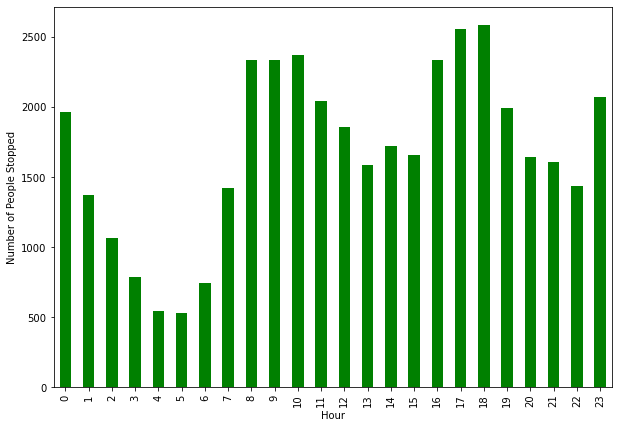

In [16]:
plt.figure(figsize = (10, 7))
time_location['hour'].value_counts().sort_index().plot.bar(color = "green")
plt.xlabel("Hour")
plt.ylabel("Number of People Stopped");

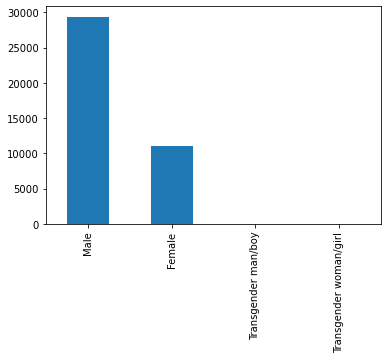

In [19]:
time_location["perceivedGender"].value_counts().plot.bar()

In [23]:
time_location.sum(axis = 0, numeric_only = True)

StopID                     1.104735e+09
stopDuration               6.762240e+05
stopInResponseToCFS        5.328000e+03
blockNumber                5.680370e+07
isSchool                   3.500000e+01
PID                        4.651400e+04
isStudent                  2.900000e+01
perceivedAge               1.413924e+06
genderNonconforming        1.030000e+02
perceivedLimitedEnglish    1.436000e+03
hour                       5.134940e+05
dtype: float64

In [7]:
race.head()

,StopID,PID,perceivedRace
0,5782,1,White
1,5785,1,White
2,5786,1,White
3,5787,1,Asian
4,5787,1,Black


In [8]:
race["perceivedRace"].value_counts()/len(race)

Hispanic                         0.347418
Black                            0.259212
White                            0.228037
Asian                            0.065468
Middle Eastern or South Asian    0.037494
Pacific Islander                 0.035332
Native American                  0.027039
Name: perceivedRace, dtype: float64

In [9]:
reason.head()

,StopID,PID,reasonForStop,reasonForStopDetail,reasonForStopcode,reasonForStopCodeText
0,5782,1,Reasonable Suspicion,Other Reasonable Suspicion of a crime,38021,273(A) PC - ILLEGAL PAY FOR ADOPTION (M) 38021
1,5785,1,Reasonable Suspicion,Other Reasonable Suspicion of a crime,65002,65002 ZZ - LOCAL ORDINANCE VIOL (I) 65002
2,5786,1,Reasonable Suspicion,Other Reasonable Suspicion of a crime,32096,602(L)(1) PC - TRSPSS:PSTD LND:RFS TO LV (M) 3...
3,5787,1,Reasonable Suspicion,Other Reasonable Suspicion of a crime,38080,273.5(A) PC - CRPL INJ:SPOUS/COHAB/DATE (F) 38080
4,5788,1,Traffic Violation,Moving Violation,54098,21453(A) VC - FAIL STOP LINE/ETC AT RED (I) 54098


In [24]:
reason["reasonForStop"].value_counts()

Traffic Violation                                                                                                    26340
Reasonable Suspicion                                                                                                 13067
Known to be on Parole / Probation / PRCS / Mandatory Supervision                                                       784
Investigation to determine whether the person was truant                                                               638
Knowledge of outstanding arrest warrant/wanted person                                                                  394
Consensual Encounter resulting in a search                                                                             296
Determine whether the student violated school policy                                                                     4
Possible conduct warranting discipline under Education Code sections 48900, 48900.2, 48900.3, 48900.4 and 48900.7        3
Name: reasonForS

In [34]:
reasoning = "Investigation to determine whether the person was truant"
stop_IDs = reason.loc[reason["reasonForStop"] == reasoning, "StopID"].unique()
time_location.loc[time_location["StopID"].isin(stop_IDs), "perceivedAge"].value_counts()

30     109
25     103
40      68
50      62
35      60
45      37
20      36
60      21
18      18
28      15
15      14
22      13
55      12
100     11
16      10
21       8
17       6
65       6
32       6
70       5
38       5
26       5
23       4
24       4
14       4
19       4
27       4
59       3
37       3
48       3
13       2
34       2
29       2
33       2
39       2
58       2
64       2
31       1
75       1
36       1
42       1
43       1
44       1
46       1
49       1
10       1
Name: perceivedAge, dtype: int64

In [37]:
truant_race = race.loc[race["StopID"].isin(stop_IDs), "perceivedRace"]
truant_race.value_counts() / len(truant_race)

Hispanic                         0.374838
Black                            0.281453
White                            0.229572
Asian                            0.049287
Pacific Islander                 0.027237
Middle Eastern or South Asian    0.019455
Native American                  0.018158
Name: perceivedRace, dtype: float64

In [10]:
result.head()

,StopID,PID,resultOfStop,resultOfStopcode,resultOfStopcodeText
0,5782,1,Field interview card completed,NaN,NaN
1,5867,1,Citation for infraction,55103.0,374.4 PC - LITTER PUB/PRIVATE PROP (I) 55103
2,5908,1,Citation for infraction,54109.0,24252(A) VC - FAIL MAINT VEH LITE EQUIP (I) 54109
3,6033,1,Citation for infraction,54372.0,21453(B) VC - TURN ONTO ONEWAY AT RED (I) 54372
4,5785,1,Citation for infraction,65000.0,65000 ZZ - LOCAL ORDINANCE VIOL (M) 65000


In [38]:
result["resultOfStop"].unique()

array(['Field interview card completed', 'Citation for infraction',
       'Warning (verbal or written)', 'No Action',
       'Custodial Arrest without warrant',
       'Custodial Arrest pursuant to outstanding warrant',
       'In-field cite and release',
       'Noncriminal transport or caretaking transport',
       'Psychiatric hold',
       'Contacted parent/legal guardian or other person responsible for the minor',
       'Referral to school counselor or other support staff',
       'Referral to school administrator',
       'Contacted U.S. Department of Homeland Security'], dtype=object)

In [47]:
resultOfStop = 'Custodial Arrest pursuant to outstanding warrant'
is_result = result["resultOfStop"] == resultOfStop
result_StopIDs = result.loc[is_result, 'StopID'].unique()
result_race = race.loc[race["StopID"].isin(result_StopIDs), "perceivedRace"]
print("Total number of result: ", sum(is_result))
result_race.value_counts() / len(result_race)

Total number of result:  1020


Hispanic                         0.349797
Black                            0.333559
White                            0.194858
Pacific Islander                 0.041949
Asian                            0.038566
Middle Eastern or South Asian    0.020974
Native American                  0.020298
Name: perceivedRace, dtype: float64

In [11]:
actions.head()

,StopID,PID,actionTakenDuringStop,personSearchConsentGiven,propertySearchConsentGiven
0,5873,1,None,NaN,NaN
1,5839,1,None,NaN,NaN
2,5782,1,Curbside detention,NaN,NaN
3,6014,1,Handcuffed or flex cuffed,NaN,NaN
4,5874,1,Handcuffed or flex cuffed,NaN,NaN


In [55]:
actions["actionTakenDuringStop"].value_counts()

None                                                    26662
Curbside detention                                       7851
Search of person was conducted                           7774
Handcuffed or flex cuffed                                4167
Patrol car detention                                     3399
Asked for consent to search person                       2399
Person removed from vehicle by order                     2354
Search of property was conducted                         2002
Property was seized                                       904
Asked for consent to search property                      621
Firearm pointed at person                                 448
Person removed from vehicle by physical contact           346
Vehicle impounded                                         306
Physical or Vehicle contact                               239
Field sobriety test conducted                             141
Person photographed                                       119
Baton or

In [65]:
actionTaken = 'None'
is_action_taken = actions["actionTakenDuringStop"] == actionTaken
action_StopIDs = actions.loc[is_action_taken, 'StopID'].unique()
action_race = race.loc[race["StopID"].isin(action_StopIDs), "perceivedRace"]
print("Total number of result: ", sum(is_action_taken))
print(action_race.value_counts() / len(action_race))
action_StopIDs = actions.loc[is_action_taken == False, 'StopID'].unique()
action_race = race.loc[race["StopID"].isin(action_StopIDs), "perceivedRace"]
print(action_race .value_counts() / len(action_race))

Total number of result:  26662
Hispanic                         0.339654
Black                            0.239486
White                            0.224449
Asian                            0.076474
Middle Eastern or South Asian    0.046519
Pacific Islander                 0.040618
Native American                  0.032800
Name: perceivedRace, dtype: float64
Hispanic                         0.365934
Black                            0.306981
White                            0.233613
Asian                            0.039884
Pacific Islander                 0.022883
Middle Eastern or South Asian    0.016807
Native American                  0.013898
Name: perceivedRace, dtype: float64
